READING CSV FILE FROM GIVEN URL

In [62]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [61]:

data = pd.read_csv('/content/Creditcard_data.csv')



In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [5]:
class0 = data[data['Class'] == 0]
class1 = data[data['Class'] == 1]

In [6]:

count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

Fraudulent "1" : 9
Not Fraudulent "0": 763


In [7]:

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#applying standard scaler on time and amount so that they are normalized to be easily applied across all ML algos.

data[['Time', 'Amount']] = StandardScaler().fit_transform(data[['Time', 'Amount']])

print(data)

         Time        V1        V2        V3        V4        V5        V6  \
0   -1.648034 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1   -1.648034  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2   -1.642211 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3   -1.642211 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4   -1.636388 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..        ...       ...       ...       ...       ...       ...       ...   
767  1.700384 -0.572263  0.731748  1.541254  0.150506  1.108974  0.372152   
768  1.723677 -1.296845 -0.511605  2.404726 -0.310762 -0.319551 -0.542842   
769  1.723677  1.214170  0.210481  0.484651  0.479768 -0.261955 -0.527039   
770  1.729501  1.267030 -0.071114  0.037680  0.512683  0.242392  0.705212   
771  1.735324  1.153758  0.132273  0.382969  1.405063 -0.224287 -0.197295   

           V7        V8        V9  ...       V21       V22       V23  \
0  

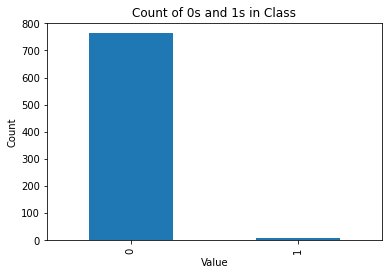

In [9]:

counts = data['Class'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Class')
plt.show()


NOW WE TRY TO BALANCE THIS DATASET USING TECHNIQUES LIKE OVERSAMPLING AND UNDERSAMPLING 

In [10]:
from imblearn.under_sampling import RandomUnderSampler

x = data.drop('Class', axis=1)
y = data['Class']

In [11]:
rus = RandomUnderSampler(random_state=0)

x,y = rus.fit_resample(x, y)

# us in the variable resampled_data_us is Under Sampling


In [12]:
y.value_counts()

0    9
1    9
Name: Class, dtype: int64

In [13]:
resampled_data_us = pd.concat([x,y],axis=1)

In [14]:
print(resampled_data_us)

        Time        V1        V2        V3        V4        V5        V6  \
0   1.094757  1.377497 -0.662565 -0.130149 -0.562680 -0.832895 -0.910754   
1  -0.133967  1.026702 -0.661665  0.897601  0.144403 -1.105205  0.020245   
2  -0.850237  0.753308 -1.131593  0.878730  0.297871 -1.327250  0.066596   
3  -1.461688 -2.008872  2.198527  0.144242  1.159432 -0.815174  0.182288   
4  -0.244610 -0.849348  1.019508  1.517236  0.579468  0.539187 -0.211665   
5   0.040733  1.355157 -1.318940  0.166357 -1.574822 -1.279267 -0.182794   
6  -0.646420  1.264699  0.168286 -0.275340  0.220631  0.459215  0.468624   
7   0.524070  1.149246  0.018358  0.430440  0.537503 -0.430754 -0.394699   
8  -1.496628 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
9  -1.648034  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
10 -0.960881  1.254914  0.350287  0.302488  0.693114 -0.371470 -1.070256   
11 -0.693007  0.073497  0.551033  0.451890  0.114964  0.822947  0.251480   
12  0.716240

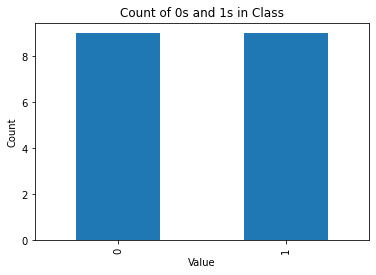

In [15]:

counts = resampled_data_us['Class'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Class')
plt.show()

In [16]:

a = data.drop('Class', axis=1)
b = data['Class']

In [17]:
from imblearn.over_sampling import SMOTE
ros = SMOTE()

a,b = ros.fit_resample(a, b)



In [18]:
b.value_counts()

0    763
1    763
Name: Class, dtype: int64

In [19]:
resampled_data_os = pd.concat([a,b],axis=1)

In [20]:
print(resampled_data_os)

          Time        V1        V2        V3        V4        V5        V6  \
0    -1.648034 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    -1.648034  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    -1.642211 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    -1.642211 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    -1.636388 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...        ...       ...       ...       ...       ...       ...       ...   
1521  1.368706  1.096097  0.390164  0.326708  0.612070 -0.196645 -0.887469   
1522  1.495984 -1.661549  0.060761  1.164429 -0.622014  0.887756 -0.311731   
1523  1.211994 -1.945041  0.736295  0.180428  1.018560  0.401344 -0.700196   
1524  1.036460 -1.143727  1.432459 -0.982461  2.915385 -0.468378 -1.309018   
1525 -0.489634  0.252600  0.800343 -0.234851  1.621712 -0.413819 -1.170368   

            V7        V8        V9  ...       V21       V22    

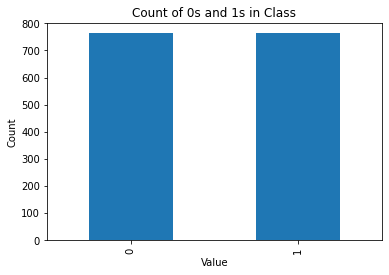

In [21]:

counts = resampled_data_os['Class'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Class')
plt.show()

WE AVOID UNDER-SAMPLING AS IT MESSES UP OUR DATASET AND SO WE USE OVER SAMPLING TO OBTAIN OUR NOW BALANCED DATASET.

NOW WE START OUR SAMPLE CREATION. WE NEED TO CREATE 5 SAMPLES SO WE CHOOSE 5 SAMPLING TECHNIQUES

In [45]:
#first we need to find the optimal n for Simple random sampling 
#values obtained from sampling ppt

p = 0.5
Z = 1.96
E = 0.05

n1 = int(round((Z**2 * p * (1-p)) / E**2))

In [46]:
#SIMPLE RANDOM SAMPLING
sample1 = resampled_data_os.sample(n1,random_state=50)
print(sample1)



          Time        V1        V2        V3        V4        V5        V6  \
66   -1.391808 -0.714764  0.514969  1.821676  0.616434  0.848776 -0.111938   
254  -0.605657 -0.431092  0.890752  1.720543 -0.238246  0.273263 -0.970191   
910   1.451353 -1.915800 -1.670981  2.052962  0.558711  1.963279  0.307572   
163  -1.048231  1.245744  0.438878  0.316140  1.107634 -0.178446 -0.941091   
868   0.471814 -1.949963  1.777704 -1.426208  3.630920 -0.461997 -1.287579   
...        ...       ...       ...       ...       ...       ...       ...   
369  -0.081557 -0.334463  0.826789  2.207683  0.470566 -0.534082 -0.702739   
1216  0.550549  1.235178  0.330997  0.258856  0.607647 -0.214795 -0.730321   
543   0.722064 -0.918109  0.798542  1.753494 -0.576985 -0.554780  0.119542   
1042  0.106001  0.162173  0.374268  1.022627  0.437604  0.298219 -0.985534   
54   -1.432571  1.295668  0.341483  0.081505  0.566746 -0.110459 -0.766325   

            V7        V8        V9  ...       V21       V22    

In [50]:
#Stratified Sampling
Z= 1.96
p= 0.5
S= 5
E=0.05

n2 = int(round((Z**2 * p * (1-p)) / (E/S)**2))


In [53]:

import pandas as pd

sample_size = n2  

sample2 = resampled_data_os.groupby('Class').apply(lambda x: x.sample(n=min(len(x), sample_size)))

print(sample2)



                Time        V1        V2        V3        V4        V5  \
Class                                                                    
0     328  -0.244610 -1.142321  0.626405  2.526917  2.827973  0.619263   
      552   0.757004 -1.075652  1.101233  0.579164 -0.459366  0.600011   
      417   0.110613 -0.986171  1.732934  0.857587  0.178950 -0.794223   
      724   1.543154 -1.233426 -0.212441  1.839632 -1.802986 -0.493195   
      200  -0.879354 -1.571359  1.687508  0.734670  1.293350 -0.217532   
...              ...       ...       ...       ...       ...       ...   
1     1436  1.201734 -1.056081  0.052853  1.827777  0.296930  1.144879   
      969   0.593618 -0.337263  0.385228  1.351766  0.320823  0.604299   
      1503 -0.269698  1.219016  0.306804  0.224392  0.548144 -0.112268   
      1335  0.491605  0.661059  0.458602  0.379963  0.400590  0.237113   
      1098  1.039685  0.932904  0.415837  0.346685  0.532739 -0.033932   

                  V6        V7       

In [25]:

# clusters = resampled_data_os.groupby('Class')

# cluster_sizes = clusters.size()

# mean_cluster_size = cluster_sizes.mean()

# print(mean_cluster_size)



763.0


In [ ]:
# Z= 1.96
# p= 0.5
# C = 763
# E=0.05

# n = int(round((Z**2 * p * (1-p)) / (E/S)**2, 0))

#Causes system crashes

In [28]:
#Cluster Sampling

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=50).fit(resampled_data_os)
clusters = kmeans.labels_

selected_clusters = [0,5,10,15,20]

cluster_series = pd.Series(clusters)

sample3 = resampled_data_os[cluster_series.isin(selected_clusters)]

sample3


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3,-1.642211,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.277334,0
5,-1.636388,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.328756,0
9,-1.595624,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.328705,0
10,-1.589801,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,-0.307866,0
12,-1.589801,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,0.267218,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.367244,-1.426060,0.185945,1.400705,-0.333013,0.938269,-0.526698,0.504270,0.026024,-0.040383,...,-0.084728,-0.009490,-0.260370,0.002695,-0.055038,-0.027348,-0.252324,-0.284158,-0.342260,1
1515,1.589322,-0.289395,0.203641,0.761372,-0.005024,0.302307,-0.666959,0.184534,-0.029100,0.019107,...,-0.231447,-0.496074,-0.073474,0.043338,-0.066048,0.169742,-0.188936,-0.183083,-0.341551,1
1518,1.520013,-1.308301,0.097544,1.060666,-0.463176,0.737038,-0.403181,0.243979,0.090236,0.022170,...,-0.194956,-0.282309,-0.205939,-0.154099,-0.255173,0.219366,-0.298754,-0.324038,-0.342050,1
1519,0.709062,-1.008785,0.105887,0.932892,-0.381511,0.706298,-0.239632,0.182445,0.126802,-0.045991,...,-0.191059,-0.303266,-0.171436,-0.262971,-0.209970,0.211825,-0.261415,-0.284374,-0.340131,1


In [54]:
#systemic sampling 
k = 10   

start_index = pd.Series(range(k)).sample(1).iloc[0]


sample4 = data.iloc[start_index::k]

print(sample4)


         Time        V1        V2        V3        V4        V5        V6  \
6   -1.624741  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
16  -1.578154  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
26  -1.514098  1.173285  0.353498  0.283905  1.133563 -0.172577 -0.916054   
36  -1.490804 -0.246046  0.473267  1.695738  0.262411 -0.010866 -0.610836   
46  -1.450041 -0.291540  0.445575  1.249752 -1.735736  0.085756 -0.121924   
..        ...       ...       ...       ...       ...       ...       ...   
726  1.548977  1.422461 -0.547422 -0.147438 -0.615979 -0.677018 -0.825597   
736  1.572271 -2.618386 -2.302449 -0.386400  0.854628 -0.861209  2.036707   
746  1.607211 -0.988420  1.044010  1.410774  0.142819 -0.477672 -0.477863   
756  1.636327 -0.203837  0.532747 -0.339857 -0.730934  2.728163  3.535882   
766  1.694561  1.257719  0.364739  0.306923  0.690638 -0.357792 -1.067481   

           V7        V8        V9  ...       V21       V22       V23  \
6  

In [56]:
#Convenience Sampling (Non probability sampling method)


sample5 = resampled_data_os.head(386)  # we take 386 because 772/2 = 386

# Print the convenience sample
print(sample5)


         Time        V1        V2        V3        V4        V5        V6  \
0   -1.648034 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1   -1.648034  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2   -1.642211 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3   -1.642211 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4   -1.636388 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..        ...       ...       ...       ...       ...       ...       ...   
381 -0.023324 -0.365229  1.104352  1.290217  0.070321  0.043432 -0.985204   
382 -0.017500  0.878794 -0.266909  0.409706  1.509808 -0.487798  0.376829   
383 -0.005854 -0.356466  0.725418  1.971749  0.831343  0.369681 -0.107776   
384 -0.005854  0.057780  1.550356 -1.950408  2.041473  2.258426  4.692012   
385 -0.005854 -0.426030  1.041184  1.063793 -0.407921  0.077615 -0.810862   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [66]:

def evaluate_models(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('Class', axis=1), dataframe['Class'], test_size=0.3, random_state=50)
  
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('SVM', SVC()),
        ('Gaussian Naive Bayes', GaussianNB())
    ]
    
    results = []
    
    for name, model in models:
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append((name, accuracy))
    
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
    
    return results_df


In [67]:

model_results = evaluate_models(sample1)
print(model_results)


                  Model  Accuracy
0   Logistic Regression  0.793103
1         Decision Tree  0.905172
2         Random Forest  1.000000
3                   SVM  0.974138
4  Gaussian Naive Bayes  0.775862


In [68]:

model_results = evaluate_models(sample2)
print(model_results)


                  Model  Accuracy
0   Logistic Regression  0.921397
1         Decision Tree  0.982533
2         Random Forest  0.995633
3                   SVM  0.975983
4  Gaussian Naive Bayes  0.707424


In [69]:

model_results = evaluate_models(sample3)
print(model_results)


                  Model  Accuracy
0   Logistic Regression  0.962963
1         Decision Tree  0.953704
2         Random Forest  0.981481
3                   SVM  1.000000
4  Gaussian Naive Bayes  0.981481


In [70]:

model_results = evaluate_models(sample4)
print(model_results)


                  Model  Accuracy
0   Logistic Regression  0.958333
1         Decision Tree  1.000000
2         Random Forest  1.000000
3                   SVM  1.000000
4  Gaussian Naive Bayes  1.000000


In [71]:

model_results = evaluate_models(sample5)
print(model_results)


                  Model  Accuracy
0   Logistic Regression  0.982759
1         Decision Tree  0.982759
2         Random Forest  0.982759
3                   SVM  0.982759
4  Gaussian Naive Bayes  0.982759
